In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# Load the dataset from a local CSV file
df = pd.read_csv('UpdatedResumeDataSet.csv')  # Replace with your file path

# Check the first few rows of the dataset
df.head()

,Category,Resume
0,Data Science,Skills • Programming Languages: Python (pandas...
1,Data Science,Projects:\nEducation Details \r\nMay 2013 to M...
2,Data Science,"Highlights:\nAreas of Interest Deep Learning, ..."
3,Data Science,Highlights:\nSkills â¢ R â¢ Python â¢ SAP H...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
#Text Preprocessing:

In [4]:
import spacy
# Removed re as it's not being used

# Load the SpaCy English model
nlp = spacy.load('en_core_web_sm')

# Initialize the stop words set from SpaCy
stop_words = nlp.Defaults.stop_words

def preprocess_text(text):
    text = text.lower()  # Lowercase text
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(lemmatized_tokens)

# Apply preprocessing to the text column
df['cleaned_text'] = df['Resume'].apply(preprocess_text)

df.head()

,Category,Resume,cleaned_text
0,Data Science,Skills • Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Projects:\nEducation Details \r\nMay 2013 to M...,project \n education detail \r\n 2013 2017 b.e...
2,Data Science,"Highlights:\nAreas of Interest Deep Learning, ...",highlight \n area interest deep learning contr...
3,Data Science,Highlights:\nSkills â¢ R â¢ Python â¢ SAP H...,highlight \n skill â¢ r â¢ python â¢ sap ha...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail \r\n mca ymcaust farida...


In [5]:
#Feature Extraction (TF-IDF)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Capturing unigrams and bigrams

# Fit and transform the cleaned text
X = tfidf_vectorizer.fit_transform(df['cleaned_text']).toarray()

# Get the target labels (Categories)
y = df['Category']  # Replace 'category_column' with your actual column name for categories

# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    # Open the provided PDF file
    doc = fitz.open(pdf_path)
    
    # Extract text from each page
    text = ""
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)  # Page is 0-indexed
        text += page.get_text()

    # Clean up the text (optional, for better processing)
    text = text.strip()  # Remove leading/trailing whitespace
    text = ' '.join(text.split())  # Remove extra spaces between words

    return text

# Example usage
pdf_text = extract_text_from_pdf("11981094.pdf")
print(pdf_text[:500])  # Print first 500 characters of the extracted text


SOFTWARE ENGINEERING MANAGER Summary Experienced software engineer, and hands-on engineering manager with 20+ years of product development experience in broadcast media, and 10+ years of experience in leading development teams (20+ engineers), hiring (10+ offers, 40+ interviews), HR personnel procedures, performance reviews, and project transitions. Experience 09/2009 to Current Software Engineering Manager Company Name ï¼​ City , State Visual C++, Windows, OOP, STL, WinAPI, MFC, threads, ATL, I


In [8]:
# Step 3: Preprocess the extracted resume text
cleaned_resume_text = preprocess_text(pdf_text)

# Step 4: Print the cleaned text to check if it's processed correctly
print(cleaned_resume_text[:500])  # Check the first 500 characters of cleaned text

software engineering manager summary experience software engineer hand engineering manager 20 + year product development experience broadcast medium 10 + year experience lead development team 20 + engineer hire 10 + offer 40 + interview hr personnel procedure performance review project transition experience 09/2009 current software engineering manager company ï¼​ city state visual c++ window oop stl winapi mfc thread atl ipc ftp tcp http xml json service web service rest api soa medium format st


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00        12
       Automation Testing       1.00      1.00      1.00        12
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00        19
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      1.00      1.00        10
                 Database       1.00      1.00      1.00        11
          DevOps Engineer       1.00      1.00      1.00        18
         DotNet Developer       1.00      1.00      1.00        12
            ETL Developer       1.00      1.00      1.00        12
   Electrical Engineering       1.00      1.00      1.00        17
                       HR       1.00      1.00      1.00        22
                   Hadoop       1.00      1.00 

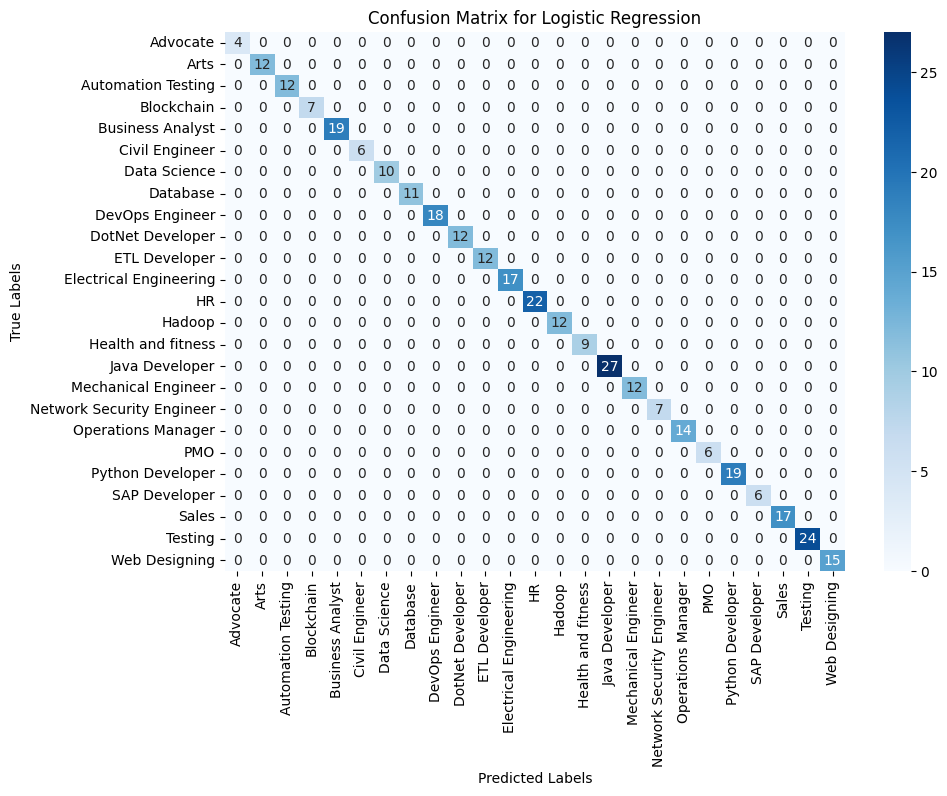

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [11]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'C': [0.1, 1, 10]}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 10}
Best Score: 0.9962121212121212


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Perform 5-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores and their mean
print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Get predictions for each fold to evaluate the performance further
y_pred_cv = cross_val_predict(model, X, y, cv=5)

# Evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(y, y_pred_cv))


Cross-Validation Accuracy Scores: [0.9969697 1.        1.        0.9969697 1.       ]
Mean Cross-Validation Accuracy: 0.9988 ± 0.0015

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        28
                     Arts       1.00      1.00      1.00        64
       Automation Testing       1.00      1.00      1.00        46
               Blockchain       1.00      1.00      1.00        60
         Business Analyst       1.00      1.00      1.00        58
           Civil Engineer       1.00      1.00      1.00        37
             Data Science       1.00      1.00      1.00        68
                 Database       1.00      1.00      1.00        70
          DevOps Engineer       1.00      0.98      0.99        91
         DotNet Developer       0.96      1.00      0.98        54
            ETL Developer       1.00      1.00      1.00        68
   Electrical Engineering       1.00 

In [13]:
# Train the model on the full training set
model.fit(X_train, y_train)

# Predict on the training set
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Predict on the test set
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Test Accuracy: 1.0000


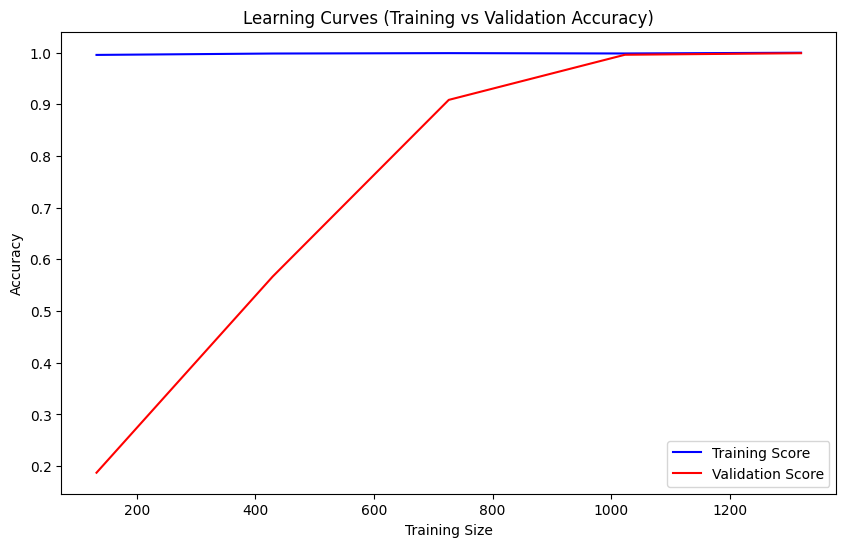

In [14]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='accuracy')

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score', color='blue')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score', color='red')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves (Training vs Validation Accuracy)')
plt.legend()
plt.show()


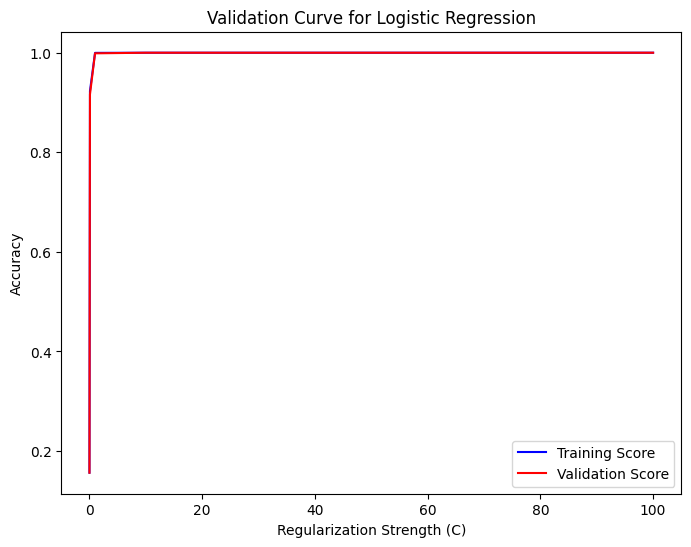

In [15]:
from sklearn.model_selection import validation_curve

# Check the effect of regularization on accuracy
param_range = [0.01, 0.1, 1, 10, 100]
train_scores, val_scores = validation_curve(LogisticRegression(), X, y, param_name="C", param_range=param_range, cv=5)

# Plot validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_scores.mean(axis=1), label='Training Score', color='blue')
plt.plot(param_range, val_scores.mean(axis=1), label='Validation Score', color='red')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Validation Curve for Logistic Regression')
plt.legend()
plt.show()


In [16]:
# Train with different values of C (regularization parameter)
model = LogisticRegression(C=1)  # Default C value
model.fit(X_train, y_train)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Train Accuracy with C=1: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Try a higher regularization (lower C)
model = LogisticRegression(C=10)
model.fit(X_train, y_train)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Train Accuracy with C=10: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


Train Accuracy with C=1: 1.0000, Test Accuracy: 1.0000
Train Accuracy with C=10: 1.0000, Test Accuracy: 1.0000


In [17]:
import joblib

# Save the model to a file
joblib.dump(model, 'logistic_regression_model.pkl')
# Load the saved model
loaded_model = joblib.load('logistic_regression_model.pkl')

# Use the model to make predictions
y_pred = loaded_model.predict(X_test)
print(y_pred)


['Electrical Engineering' 'HR' 'Testing' 'Electrical Engineering'
 'Data Science' 'HR' 'Python Developer' 'Sales' 'Operations Manager'
 'Arts' 'DevOps Engineer' 'Electrical Engineering' 'Java Developer'
 'Data Science' 'Testing' 'Java Developer' 'Electrical Engineering'
 'Java Developer' 'Data Science' 'Testing' 'ETL Developer' 'Arts'
 'Operations Manager' 'Sales' 'DevOps Engineer' 'Civil Engineer'
 'Business Analyst' 'Testing' 'Electrical Engineering' 'Web Designing'
 'Testing' 'Testing' 'Electrical Engineering' 'Network Security Engineer'
 'Business Analyst' 'Civil Engineer' 'Sales' 'PMO' 'Mechanical Engineer'
 'Data Science' 'Java Developer' 'PMO' 'Arts' 'Python Developer'
 'Data Science' 'HR' 'Automation Testing' 'Python Developer'
 'Operations Manager' 'Testing' 'Automation Testing' 'Testing' 'Advocate'
 'Java Developer' 'Automation Testing' 'DevOps Engineer' 'Blockchain'
 'Web Designing' 'Business Analyst' 'Web Designing'
 'Electrical Engineering' 'Python Developer' 'Automation T

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel works well for text data

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 1.0
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00        12
       Automation Testing       1.00      1.00      1.00        12
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00        19
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      1.00      1.00        10
                 Database       1.00      1.00      1.00        11
          DevOps Engineer       1.00      1.00      1.00        18
         DotNet Developer       1.00      1.00      1.00        12
            ETL Developer       1.00      1.00      1.00        12
   Electrical Engineering       1.00      1.00      1.00        17
                       HR       1.00      1.00      1.00        22
                   Hadoop       1.00      1

In [19]:
#Crossvalidation for SVM
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.2f} ± {cross_val_scores.std():.2f}")


Cross-Validation Accuracy: 1.00 ± 0.00


In [20]:
svm_model = SVC(kernel='rbf', random_state=42)  # RBF kernel
svm_model.fit(X_train, y_train)
print("Accuracy:", model.score(X_train, y_train))


Accuracy: 1.0


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale']}
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


Best parameters: {'C': 1, 'gamma': 1}
Best cross-validation score: 1.0


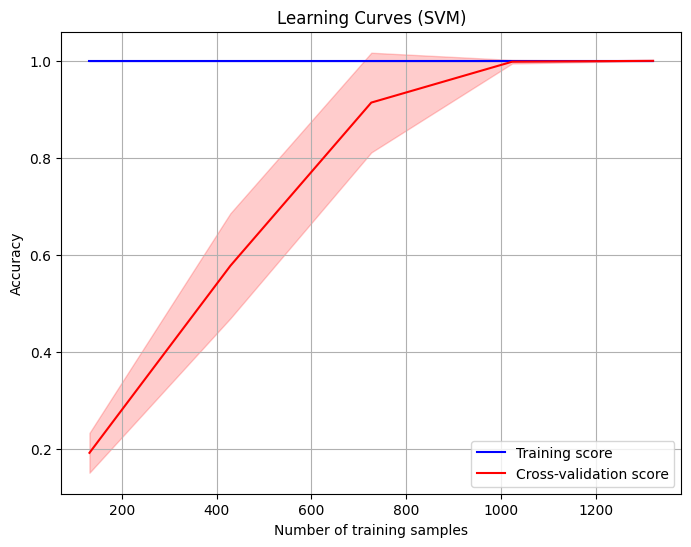

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

# Initialize the model
model = SVC(kernel='linear', C=1)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of train and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', label='Training score')
plt.plot(train_sizes, val_mean, color='red', label='Cross-validation score')

# Add shaded regions for the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='red', alpha=0.2)

# Labels and title
plt.title('Learning Curves (SVM)')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


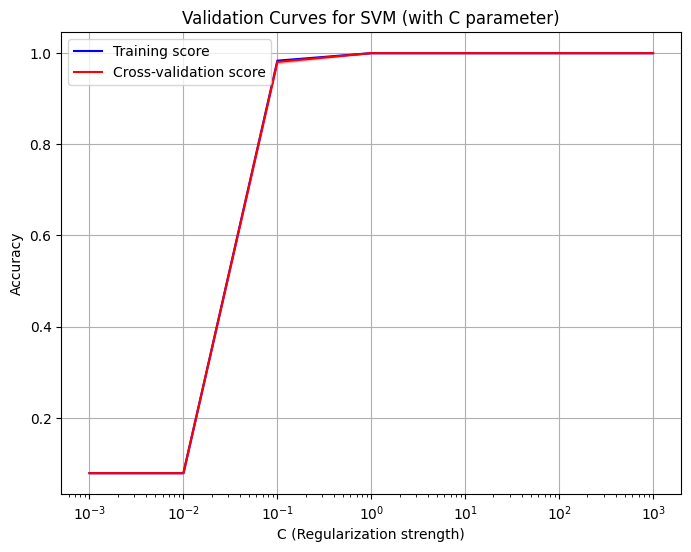

In [23]:
from sklearn.model_selection import validation_curve
import numpy as np

# Range of C values to test
param_range = np.logspace(-3, 3, 7)

# Generate validation curves for the linear SVM
train_scores, val_scores = validation_curve(
    SVC(kernel='linear'), X, y, param_name="C", param_range=param_range, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of train and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot the validation curves
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, color='blue', label='Training score')
plt.plot(param_range, val_mean, color='red', label='Cross-validation score')

# Add shaded regions for the standard deviation
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, color='red', alpha=0.2)

# Labels and title
plt.title('Validation Curves for SVM (with C parameter)')
plt.xlabel('C (Regularization strength)')
plt.ylabel('Accuracy')
plt.xscale('log')  # Use logarithmic scale for C values
plt.legend(loc='best')
plt.grid(True)
plt.show()


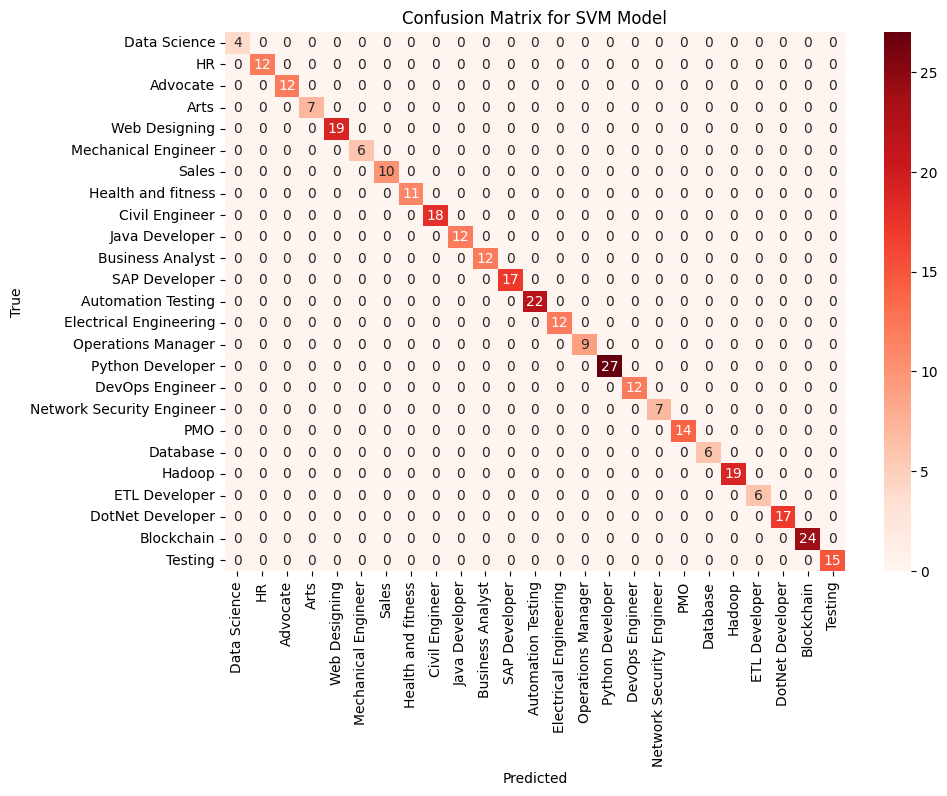

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM Model')
plt.show()


In [25]:
# Evaluate Logistic Regression and SVM models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

Logistic Regression Accuracy: 1.0
SVM Accuracy: 1.0


In [26]:
import joblib

# Save the model and vectorizer
joblib.dump(svm_model, 'svm_model.pkl')  # Save SVM model
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')  # Save TF-IDF vectorizer

# Load the model and vectorizer when needed
svm_model = joblib.load('svm_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')


In [27]:
import re

# List of relevant skills/keywords
skills_keywords = ['python', 'sql', 'machine learning', 'java', 'c++', 'project management', 'data science']

def screen_resume_for_skills(resume_text, keywords):
    # Convert the resume text to lowercase for case-insensitive matching
    resume_text = resume_text.lower()

    # Find matches for each keyword in the resume text
    matched_skills = [keyword for keyword in keywords if keyword.lower() in resume_text]

    return matched_skills

# Example usage
pdf_path = '11981094.pdf'  # Replace with your actual file path
resume_text = extract_text_from_pdf(pdf_path)  # Extract text from the resume
matched_skills = screen_resume_for_skills(resume_text, skills_keywords)

# Display results
if matched_skills:
    print("Matched Skills/Keywords:", matched_skills)
else:
    print("No relevant skills found.")


Matched Skills/Keywords: ['java', 'c++']


In [28]:
# Define a list of possible educational qualifications
education_keywords = ['bachelor', 'master', 'phd', 'degree', 'bsc', 'msc']

def screen_resume_for_education(resume_text, education_keywords):
    # Convert the resume text to lowercase for case-insensitive matching
    resume_text = resume_text.lower()

    # Find matches for each education keyword in the resume text
    matched_education = [keyword for keyword in education_keywords if keyword.lower() in resume_text]

    return matched_education

# Example usage
matched_education = screen_resume_for_education(resume_text, education_keywords)

# Display results
if matched_education:
    print("Matched Education Qualifications:", matched_education)
else:
    print("No relevant education qualifications found.")


Matched Education Qualifications: ['master']


In [29]:
def screen_resume(resume_text):
    matched_skills = screen_resume_for_skills(resume_text, skills_keywords)
    matched_education = screen_resume_for_education(resume_text, education_keywords)
    
    # Return the screening results
    return matched_skills, matched_education


In [30]:
##Test PLan

In [31]:
import os
import joblib
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from pdfminer.high_level import extract_text
import fitz
import spacy
import nltk

# Load the trained models and vectorizer
logistic_regression_model = joblib.load('logistic_regression_model.pkl')
svm_model = joblib.load('svm_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Load Spacy's English language model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Preprocessing function (same as during training)
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(lemmatized_tokens)

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        text += page.get_text()
    text = text.strip()
    text = ' '.join(text.split())
    return text

# Test with new resumes (PDF files)
def test_on_new_resumes(new_resumes_paths):
    # Collect predictions
    results = []
    for resume_path in new_resumes_paths:
        resume_text = extract_text_from_pdf(resume_path)
        cleaned_resume_text = preprocess_text(resume_text)
        resume_features = tfidf_vectorizer.transform([cleaned_resume_text]).toarray()
        
        # Get predictions from both models
        logistic_pred = logistic_regression_model.predict(resume_features)
        svm_pred = svm_model.predict(resume_features)
        
        # Record predictions
        results.append({
            'Resume': resume_path,
            'Logistic Regression Prediction': logistic_pred[0],
            'SVM Prediction': svm_pred[0]
        })
    
    # Return results in a DataFrame for better visualization
    return pd.DataFrame(results)

# Define new resume PDF paths
new_resumes_paths = ['11981094.pdf']  # Replace with actual paths

# Evaluate on new resumes
new_results = test_on_new_resumes(new_resumes_paths)
print(new_results)


         Resume Logistic Regression Prediction   SVM Prediction
0  11981094.pdf                DevOps Engineer  DevOps Engineer


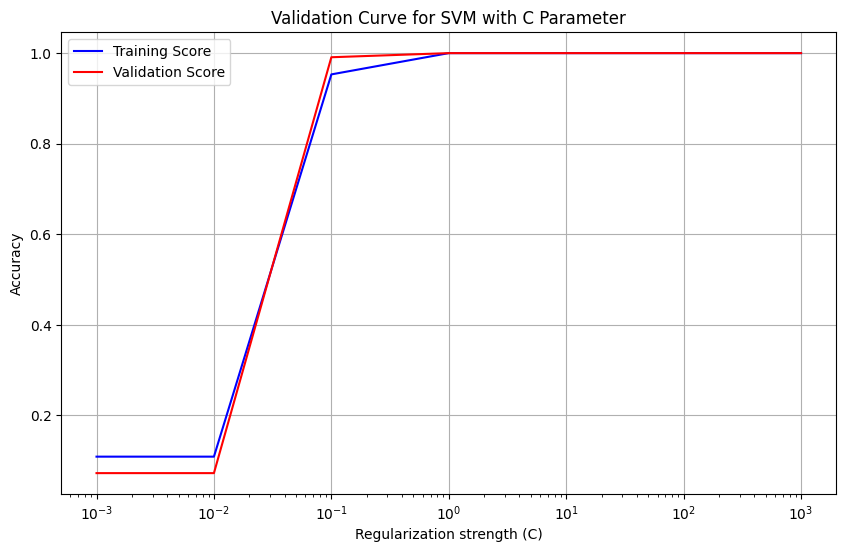

Best C parameter: 1.0


In [32]:
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assume X and y are your feature matrix and target vector (same data used for training)
# Load your dataset if it's not already loaded, or use a predefined dataset

# Example: Use preloaded TF-IDF features and labels (replace with your actual dataset)
X = tfidf_vectorizer.transform(df['cleaned_text']).toarray()  # Use the preprocessed resume data
y = df['Category']  # Replace with your actual label column

# Split the dataset into training and test sets (if not done already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Values for the C parameter to test
C_values = np.logspace(-3, 3, 7)  # C values from 0.001 to 1000

# Store results
train_scores = []
val_scores = []

for C in C_values:
    # Train SVM model with current C value
    svm_model = SVC(C=C, kernel='linear', random_state=42)
    
    # Cross-validation on training set
    train_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
    train_scores.append(train_cv_scores.mean())
    
    # Evaluate on the validation set (test set)
    svm_model.fit(X_train, y_train)
    val_score = svm_model.score(X_test, y_test)
    val_scores.append(val_score)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores, label='Training Score', color='blue')
plt.semilogx(C_values, val_scores, label='Validation Score', color='red')
plt.xlabel('Regularization strength (C)')
plt.ylabel('Accuracy')
plt.title('Validation Curve for SVM with C Parameter')
plt.legend()
plt.grid(True)
plt.show()

# Select the best C based on the highest validation score
best_C = C_values[np.argmax(val_scores)]
print(f"Best C parameter: {best_C}")


In [33]:
#Hypothesis 1:

In [34]:
import os
import joblib
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from pdfminer.high_level import extract_text
import fitz
import spacy
import nltk

# Load the trained models and vectorizer
logistic_regression_model = joblib.load('logistic_regression_model.pkl')
svm_model = joblib.load('svm_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Load Spacy's English language model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Preprocessing function (same as during training)
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(lemmatized_tokens)

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        text += page.get_text()
    text = text.strip()
    text = ' '.join(text.split())
    return text

# Example function to fetch true label based on resume file name (manual labeling)
def get_true_label(resume_path):
    # Replace this with actual true labels for your resumes
    true_labels = {
        '11981094.pdf': 'DevOps Engineer',  # Example of manually assigned label
        # Add more resume labels here
    }
    
    # Return the true label for the given resume
    return true_labels.get(resume_path, None)  # If the label is not found, return None

# Test with new resumes (PDF files)
def evaluate_models_on_new_data(new_resumes_paths):
    results = {
        "Logistic Regression Precision": [],
        "Logistic Regression Recall": [],
        "SVM Precision": [],
        "SVM Recall": [],
        "Logistic Regression F1": [],
        "SVM F1": [],
    }

    for resume_path in new_resumes_paths:
        # Extract and preprocess resume text
        resume_text = extract_text_from_pdf(resume_path)
        cleaned_resume_text = preprocess_text(resume_text)
        resume_features = tfidf_vectorizer.transform([cleaned_resume_text]).toarray()
        
        # Get predictions from both models
        logistic_pred = logistic_regression_model.predict(resume_features)
        svm_pred = svm_model.predict(resume_features)

        # Calculate precision, recall, F1-score (assuming ground truth is available)
        ground_truth = get_true_label(resume_path)  # Get true label using the function

        if ground_truth:  # If the true label is found
            results["Logistic Regression Precision"].append(precision_score([ground_truth], logistic_pred, average='weighted'))
            results["Logistic Regression Recall"].append(recall_score([ground_truth], logistic_pred, average='weighted'))
            results["SVM Precision"].append(precision_score([ground_truth], svm_pred, average='weighted'))
            results["SVM Recall"].append(recall_score([ground_truth], svm_pred, average='weighted'))
            results["Logistic Regression F1"].append(f1_score([ground_truth], logistic_pred, average='weighted'))
            results["SVM F1"].append(f1_score([ground_truth], svm_pred, average='weighted'))
        else:
            print(f"Warning: True label for {resume_path} not found.")
    
    # Return results in a DataFrame for better visualization
    return pd.DataFrame(results)

# Define new resume PDF paths
new_resumes_paths = ['11981094.pdf']  # Replace with actual paths

# Evaluate the models on new resume data
evaluation_results = evaluate_models_on_new_data(new_resumes_paths)

# Print the evaluation results
print(evaluation_results)


   Logistic Regression Precision  Logistic Regression Recall  SVM Precision  \
0                            1.0                         1.0            1.0   

   SVM Recall  Logistic Regression F1  SVM F1  
0         1.0                     1.0     1.0  


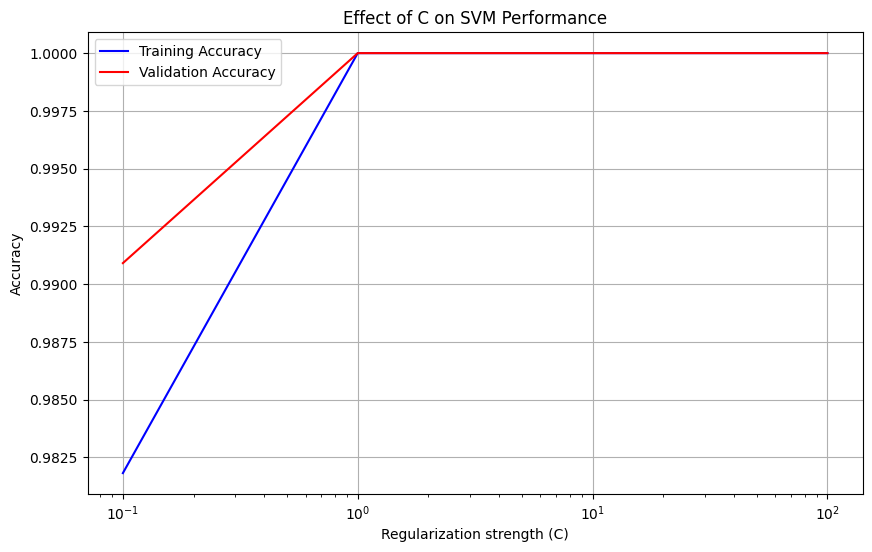

Best C parameter: 1


In [35]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Values for the C parameter to test
C_values = [0.1, 1, 10, 100]

# Store results
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1_scores = []
val_f1_scores = []

# Train and evaluate SVM model with different C values
for C in C_values:
    svm_model = SVC(C=C, kernel='linear', random_state=42)
    
    # Train the model
    svm_model.fit(X_train, y_train)

    # Evaluate on training set
    train_preds = svm_model.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, train_preds))
    train_precisions.append(precision_score(y_train, train_preds, average='weighted'))
    train_recalls.append(recall_score(y_train, train_preds, average='weighted'))
    train_f1_scores.append(f1_score(y_train, train_preds, average='weighted'))
    
    # Evaluate on validation (test) set
    val_preds = svm_model.predict(X_test)
    val_accuracies.append(accuracy_score(y_test, val_preds))
    val_precisions.append(precision_score(y_test, val_preds, average='weighted'))
    val_recalls.append(recall_score(y_test, val_preds, average='weighted'))
    val_f1_scores.append(f1_score(y_test, val_preds, average='weighted'))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy', color='blue')
plt.plot(C_values, val_accuracies, label='Validation Accuracy', color='red')
plt.xscale('log')
plt.xlabel('Regularization strength (C)')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVM Performance')
plt.legend()
plt.grid(True)
plt.show()

# Output the best C value
best_C = C_values[np.argmax(val_accuracies)]
print(f"Best C parameter: {best_C}")
